In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer

# import data

In [2]:
#read csv files
sessions=pd.read_csv("sessions.csv")
test_users=pd.read_csv("test_users.csv")
train_users_2=pd.read_csv("train_users_2.csv")

# Data Exploration 

In [3]:
test_users.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')

In [4]:
train_users_2.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [5]:
sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


# Feature Engireeing

In [6]:
grouped_sesions = sessions[['user_id','secs_elapsed']].groupby('user_id').max().reset_index()
grouped_sesions

,user_id,secs_elapsed
0,00023iyk9l,567165.0
1,0010k6l0om,127898.0
2,001wyh0pz8,50548.0
3,0028jgx1x1,84636.0
4,002qnbzfs5,1418284.0
...,...,...
135478,zzxox7jnrx,98479.0
135479,zzy7t0y9cm,42612.0
135480,zzysuoqg6x,1533.0
135481,zzywmcn0jv,525635.0


In [7]:
#merge data train_users2 and grouped_sesions
merged_training = train_users_2.merge(grouped_sesions,left_on='id',right_on='user_id',how='left')
merged_training

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,user_id,secs_elapsed
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,NaN,NaN
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,NaN,NaN
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,zxodksqpep,1445590.0
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,mhewnxesx9,748658.0
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,6o3arsjbb4,149128.0
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,jh95kwisub,66636.0


In [8]:
merged_training.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
user_id                     object
secs_elapsed               float64
dtype: object

In [9]:
#understand categorical variables
inspection_cols = ["gender","signup_method","signup_flow","language","affiliate_channel",
                          "affiliate_provider","first_affiliate_tracked","signup_app","first_device_type",
                          "first_browser","secs_elapsed"]
df_model = merged_training[inspection_cols]

for col, _ in df_model.iteritems():
    count = df_model[col].value_counts()
    print(col,count)

gender -unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64
signup_method basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64
signup_flow 0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64
language en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
th        24
el        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64
affiliate_channel direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                

In [10]:
merged_training['age']

0          NaN
1         38.0
2         56.0
3         42.0
4         41.0
          ... 
213446    32.0
213447     NaN
213448    32.0
213449     NaN
213450     NaN
Name: age, Length: 213451, dtype: float64

# Cleaning age column

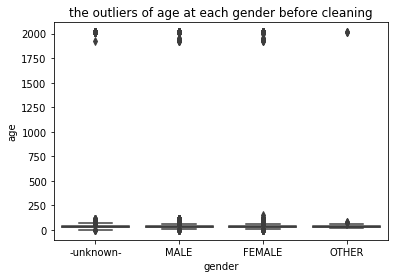

In [11]:
sns.boxplot(x="gender", y="age",data=merged_training).set_title('the outliers of age at each gender before cleaning');
plt.rcParams['figure.figsize']=(15,15)
plt.savefig("the outliers of age at each gender before cleaning")

In [12]:
merged_training.loc[merged_training['age'] > 80, 'age'] = np.nan
merged_training.loc[merged_training['age'] < 15, 'age'] = np.nan
merged_training.loc[merged_training['age'].isnull(), 'age' ] = merged_training['age'].median()

In [13]:
merged_training['age']

0         33.0
1         38.0
2         56.0
3         42.0
4         41.0
          ... 
213446    32.0
213447    33.0
213448    32.0
213449    33.0
213450    33.0
Name: age, Length: 213451, dtype: float64

In [14]:
merged_training['signup_flow'] = merged_training['signup_flow'].astype('str')

In [15]:
needed_cols = ["gender","signup_method","signup_flow","language","affiliate_channel",
                          "affiliate_provider","first_affiliate_tracked","signup_app","first_device_type",
                          "first_browser","secs_elapsed", "age"]

In [16]:
modeling_data = merged_training[needed_cols]
modeling_data

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,secs_elapsed,age
0,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NaN,33.0
1,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NaN,38.0
2,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN,56.0
3,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NaN,42.0
4,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NaN,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...
213446,MALE,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,1445590.0,32.0
213447,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,748658.0,33.0
213448,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,149128.0,32.0
213449,-unknown-,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,66636.0,33.0


In [17]:
modeling_data.dtypes

gender                      object
signup_method               object
signup_flow                 object
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
secs_elapsed               float64
age                        float64
dtype: object

In [18]:
cols_ohe = ["gender","signup_method","signup_flow","language","affiliate_channel",
                          "affiliate_provider","first_affiliate_tracked","signup_app","first_device_type",
                          "first_browser"]

In [19]:
modeling_data[cols_ohe].dtypes

gender                     object
signup_method              object
signup_flow                object
language                   object
affiliate_channel          object
affiliate_provider         object
first_affiliate_tracked    object
signup_app                 object
first_device_type          object
first_browser              object
dtype: object

In [20]:
#take a look at unique values
for col, _ in modeling_data[cols_ohe].iteritems():
    print('col_name:\n', col,'\nunique:', modeling_data[col].unique())

col_name:
 gender 
unique: ['-unknown-' 'MALE' 'FEMALE' 'OTHER']
col_name:
 signup_method 
unique: ['facebook' 'basic' 'google']
col_name:
 signup_flow 
unique: ['0' '3' '2' '1' '24' '8' '6' '5' '10' '25' '12' '4' '16' '15' '20' '21'
 '23']
col_name:
 language 
unique: ['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is']
col_name:
 affiliate_channel 
unique: ['direct' 'seo' 'other' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api']
col_name:
 affiliate_provider 
unique: ['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum']
col_name:
 first_affiliate_tracked 
unique: ['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']
col_name:
 signup_app 
unique: ['Web' 'Moweb' 'iOS' 'Android']
col_name:
 first_device_type 
unique: ['Mac Desktop' 'Windows Deskto

In [21]:
#replace na from sec_elapsed column
modeling_data["secs_elapsed"].fillna(0,inplace=True)

C:\Users\shalan\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [22]:
modeling_data

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,secs_elapsed,age
0,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0.0,33.0
1,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0.0,38.0
2,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,0.0,56.0
3,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,0.0,42.0
4,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...
213446,MALE,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,1445590.0,32.0
213447,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,748658.0,33.0
213448,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,149128.0,32.0
213449,-unknown-,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,66636.0,33.0


In [23]:
modeling_data['first_affiliate_tracked'].unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [24]:
for col, _ in modeling_data[cols_ohe].iteritems():
    print('col_name:\n', col,'\nunique:', modeling_data[col].unique())

col_name:
 gender 
unique: ['-unknown-' 'MALE' 'FEMALE' 'OTHER']
col_name:
 signup_method 
unique: ['facebook' 'basic' 'google']
col_name:
 signup_flow 
unique: ['0' '3' '2' '1' '24' '8' '6' '5' '10' '25' '12' '4' '16' '15' '20' '21'
 '23']
col_name:
 language 
unique: ['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is']
col_name:
 affiliate_channel 
unique: ['direct' 'seo' 'other' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api']
col_name:
 affiliate_provider 
unique: ['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum']
col_name:
 first_affiliate_tracked 
unique: ['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']
col_name:
 signup_app 
unique: ['Web' 'Moweb' 'iOS' 'Android']
col_name:
 first_device_type 
unique: ['Mac Desktop' 'Windows Deskto

#modeling_data.replace({np.NaN: 'other'})

# Data visualization

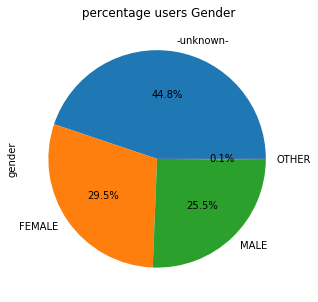

In [25]:
#the precentage of user gender
modeling_data['gender'].value_counts().plot(kind='pie',figsize=(5,5),title=" percentage users Gender",autopct='%1.1f%%')
plt.savefig("gender")

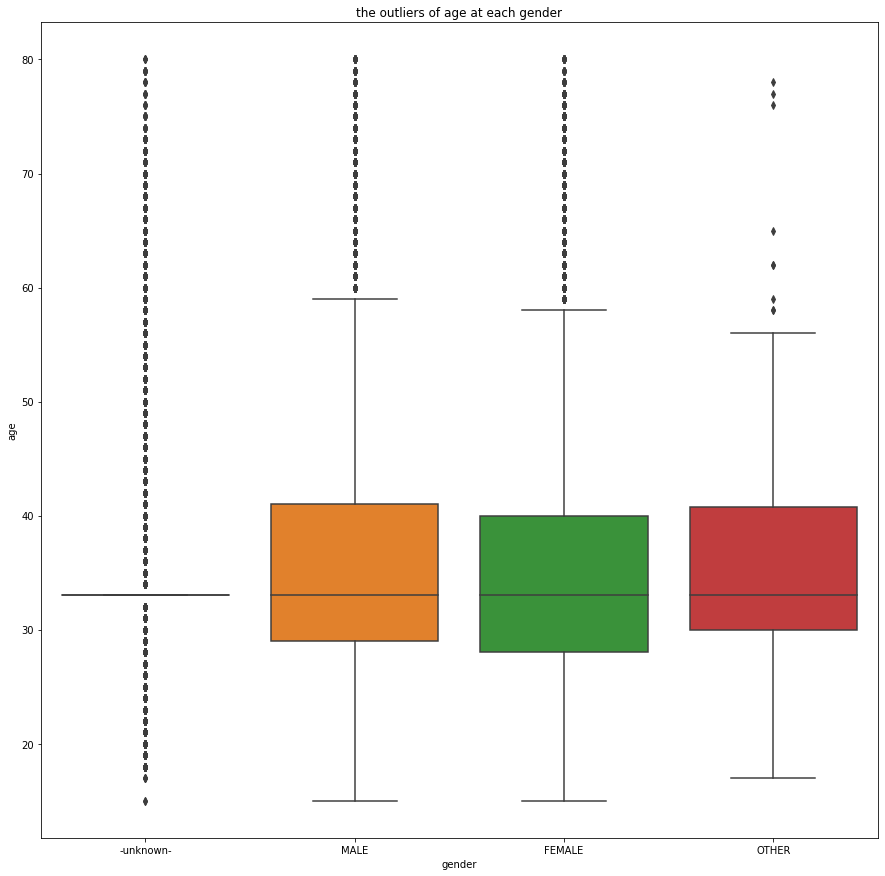

In [26]:
sns.boxplot(x="gender", y="age",data=modeling_data).set_title('the outliers of age at each gender');
plt.rcParams['figure.figsize']=(5,5)
plt.savefig("the outliers of age at each gender")

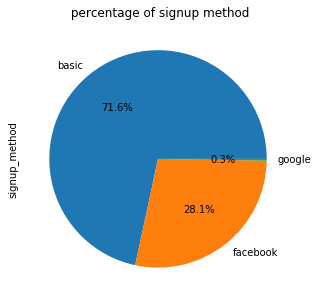

In [27]:
modeling_data['signup_method'].value_counts().plot(kind='pie',figsize=(5,5),title=" percentage of signup method",autopct='%1.1f%%')
plt.savefig("signup_method")

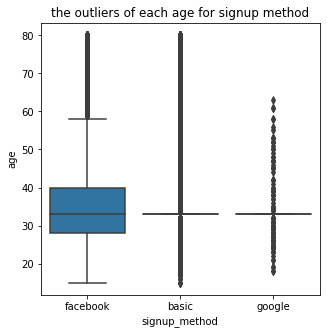

In [28]:
sns.boxplot(x="signup_method", y="age",data=modeling_data).set_title('the outliers of each age for signup method');
plt.rcParams['figure.figsize']=(5,5)
plt.savefig("the outliers of each age for signup method")

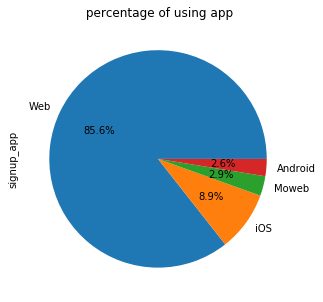

In [29]:
modeling_data['signup_app'].value_counts().plot(kind='pie',figsize=(5,5),title=" percentage of using app",autopct='%1.1f%%')
plt.savefig("signup_app")

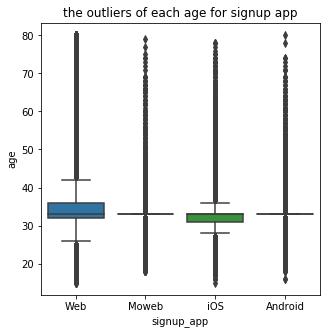

In [30]:
sns.boxplot(x="signup_app", y="age",data=modeling_data).set_title('the outliers of each age for signup app');
plt.rcParams['figure.figsize']=(5,5)
plt.savefig("the outliers of each age for signup app")

In [31]:
modeling_data.dtypes

gender                      object
signup_method               object
signup_flow                 object
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
secs_elapsed               float64
age                        float64
dtype: object

In [32]:
modeling_data[cols_ohe]

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
...,...,...,...,...,...,...,...,...,...,...
213446,MALE,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari
213447,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
213448,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
213449,-unknown-,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari


In [33]:
modeling_data['first_affiliate_tracked'].unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [34]:
#replace nan from first_affiliate_tracked column
modeling_data['first_affiliate_tracked'] = modeling_data['first_affiliate_tracked'].replace({np.nan: 'other'})

C:\Users\shalan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
modeling_data['first_affiliate_tracked'].unique()

array(['untracked', 'omg', 'other', 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

# One Hot Encoding to categorical features

In [36]:
ohe = OneHotEncoder(handle_unknown='ignore')
modeling_data = pd.DataFrame(modeling_data)
#Z = ohe.fit_transform(modeling_data[cols_ohe].to_numpy())
results = ohe.fit_transform(modeling_data[cols_ohe])
df_results = pd.DataFrame.sparse.from_spmatrix(results)
df_results.columns = ohe.get_feature_names(modeling_data[cols_ohe].columns)
df_results

,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,signup_flow_0,signup_flow_1,signup_flow_10,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213447,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213448,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213449,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#add numerical features to categorical
cop_ohe = df_results.copy()
cop_ohe[["secs_elapsed", "age"]] = modeling_data[["secs_elapsed", "age"]]
cop_ohe

,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,signup_flow_0,signup_flow_1,signup_flow_10,...,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,secs_elapsed,age
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1445590.0,32.0
213447,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,748658.0,33.0
213448,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149128.0,32.0
213449,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66636.0,33.0


In [38]:
all_modelling_data = cop_ohe.copy()
all_modelling_data

,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,signup_flow_0,signup_flow_1,signup_flow_10,...,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,secs_elapsed,age
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1445590.0,32.0
213447,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,748658.0,33.0
213448,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149128.0,32.0
213449,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66636.0,33.0


In [39]:
y=train_users_2[['country_destination']]

In [40]:
y['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [41]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(all_modelling_data, y, test_size=0.05, stratify = y) # 95% training and 5% test

# Modeling

# Logistic regression

In [42]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\shalan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shalan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
print("Prediction on training set:", lr_model.predict(X_train))
print("Accuracy on training set:", lr_model.score(X_train, y_train))
print("Accuracy on validation set:", lr_model.score(X_test, y_test))

Prediction on training set: ['NDF' 'NDF' 'NDF' ... 'NDF' 'NDF' 'NDF']
Accuracy on training set: 0.5834755249583288
Accuracy on validation set: 0.5834348355663824


# Decision Trees

In [44]:
dt_clf = tree.DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)

In [45]:
print("Prediction on training set:", dt_clf.predict(X_train))
print("Accuracy on training set:", dt_clf.score(X_train, y_train))
print("Accuracy on validation set:", dt_clf.score(X_test, y_test))

Prediction on training set: ['US' 'NDF' 'NDF' ... 'US' 'NDF' 'NDF']
Accuracy on training set: 0.8190977324956357
Accuracy on validation set: 0.5569193291483182


# Decision Trees max depth = 10

In [46]:
dt_clf = tree.DecisionTreeClassifier(max_depth=10)
dt_clf = dt_clf.fit(X_train, y_train)

In [47]:
print("Prediction on training set:", dt_clf.predict(X_train))
print("Accuracy on training set:", dt_clf.score(X_train, y_train))
print("Accuracy on validation set:", dt_clf.score(X_test, y_test))

Prediction on training set: ['NDF' 'US' 'NDF' ... 'US' 'NDF' 'NDF']
Accuracy on training set: 0.6363461519494226
Accuracy on validation set: 0.630282020050595


# RandomForestClassifier

In [48]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf_clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train, y_train)

C:\Users\shalan\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
print("Prediction on training set:", rf_clf.predict(X_train))
print("Accuracy on training set:", rf_clf.score(X_train, y_train))
print("Accuracy on validation set:", rf_clf.score(X_test, y_test))

Prediction on training set: ['US' 'NDF' 'NDF' ... 'US' 'NDF' 'NDF']
Accuracy on training set: 0.8190336229768516
Accuracy on validation set: 0.5810924763421719


# RandomForestClassifier n = 100 & max depth = 10

In [50]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf_clf=RandomForestClassifier(n_estimators=100, max_depth = 10)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train, y_train)

C:\Users\shalan\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
print("Prediction on training set:", rf_clf.predict(X_train))
print("Accuracy on training set:", rf_clf.score(X_train, y_train))
print("Accuracy on validation set:", rf_clf.score(X_test, y_test))

Prediction on training set: ['NDF' 'NDF' 'NDF' ... 'NDF' 'NDF' 'NDF']
Accuracy on training set: 0.606476047697482
Accuracy on validation set: 0.604047596739436
